In [4]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [20]:
cdf = pd.read_csv('zomato_restaurants_in_India.csv')

In [21]:
cdf.shape

(211944, 26)

In [7]:
cdf.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [8]:
cdf.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [9]:
cdf.cuisines

0         North Indian, South Indian, Mithai, Street Foo...
1         North Indian, Mughlai, Rolls, Chinese, Fast Fo...
2                                         Fast Food, Mithai
3                 Desserts, Bakery, Fast Food, South Indian
4                        North Indian, Continental, Italian
                                ...                        
211939                                         North Indian
211940                                            Fast Food
211941                      Gujarati, North Indian, Chinese
211942                           Fast Food, Sandwich, Salad
211943                           Cafe, Healthy Food, Coffee
Name: cuisines, Length: 211944, dtype: object

In [10]:
cdf.isnull().mean()*100 #Checking for null values

res_id                   0.000000
name                     0.000000
establishment            0.000000
url                      0.000000
address                  0.063224
city                     0.000000
city_id                  0.000000
locality                 0.000000
latitude                 0.000000
longitude                0.000000
zipcode                 76.995338
country_id               0.000000
locality_verbose         0.000000
cuisines                 0.656305
timings                  1.827841
average_cost_for_two     0.000000
price_range              0.000000
currency                 0.000000
highlights               0.000000
aggregate_rating         0.000000
rating_text              0.000000
votes                    0.000000
photo_count              0.000000
opentable_support        0.022647
delivery                 0.000000
takeaway                 0.000000
dtype: float64

In [11]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [12]:
cdf.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [22]:
# Dropping unwanted features ['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id','locality', 'latitude', 'longitude', 'zipcode', 'country_id']
cdf.drop(['res_id','establishment','url','address','city_id','latitude','longitude','zipcode','country_id'],axis=1,inplace=True)

In [23]:
cdf.shape

(211944, 17)

In [24]:
cdf.head()

,name,city,locality,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,Bikanervala,Agra,Khandari,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,Mama Chicken Mama Franky House,Agra,Agra Cantt,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,Bhagat Halwai,Agra,Shahganj,"Shahganj, Agra","Fast Food, Mithai",9:30 AM to 11 PM,300,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,Bhagat Halwai,Agra,Civil Lines,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,The Salt Cafe Kitchen & Bar,Agra,Tajganj,"Tajganj, Agra","North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [25]:
cdf.columns

Index(['name', 'city', 'locality', 'locality_verbose', 'cuisines', 'timings',
       'average_cost_for_two', 'price_range', 'currency', 'highlights',
       'aggregate_rating', 'rating_text', 'votes', 'photo_count',
       'opentable_support', 'delivery', 'takeaway'],
      dtype='object')

In [26]:
#Still there are some features which are not necessary i.e we have columns like 'city, locality, locality_verbose'. In which
# column city equivalent, similarly 'currency' column is not required since this dataset belongs to indian restaurents, so 
#currency will be the same, so im dropping 'locality', 'locality_verbose', 'currency' columns also.
cdf.drop(['locality', 'locality_verbose', 'currency'],axis=1, inplace=True)

In [27]:
cdf.head()

,name,city,cuisines,timings,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,Bikanervala,Agra,"North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,Mama Chicken Mama Franky House,Agra,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,Bhagat Halwai,Agra,"Fast Food, Mithai",9:30 AM to 11 PM,300,1,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,Bhagat Halwai,Agra,"Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300,1,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,The Salt Cafe Kitchen & Bar,Agra,"North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000,3,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [28]:
cdf.columns

Index(['name', 'city', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'highlights', 'aggregate_rating', 'rating_text', 'votes',
       'photo_count', 'opentable_support', 'delivery', 'takeaway'],
      dtype='object')

In [39]:
#unique values of column city
cdf['city'].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [44]:
# number of restaurents per city
res_per_city = cdf['city'].value_counts()
res_per_city

Chennai          11630
Mumbai            6497
Bangalore         4971
Pune              4217
Lucknow           4121
                 ...  
Ghaziabad          132
Faridabad          124
Howrah              66
Greater Noida       33
Nayagaon            17
Name: city, Length: 99, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98],
 <a list of 99 Text xticklabel objects>)

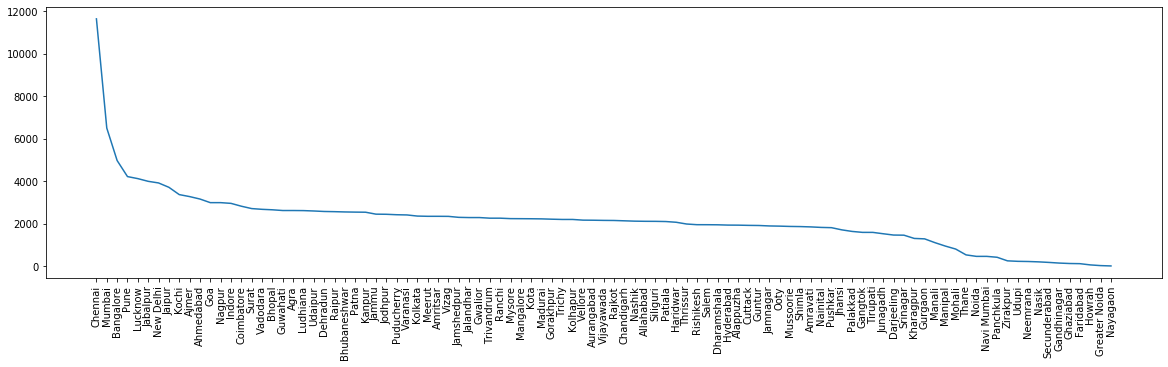

In [63]:
plt.figure(figsize=(20,5))
plt.plot(res_per_city)
plt.xticks(rotation=90)

In [65]:
# Handling Null values
cdf.isnull().sum()

name                       0
city                       0
cuisines                1391
timings                 3874
average_cost_for_two       0
price_range                0
highlights                 0
aggregate_rating           0
rating_text                0
votes                      0
photo_count                0
opentable_support         48
delivery                   0
takeaway                   0
dtype: int64

In [66]:
cdf.dropna(inplace=True)

In [67]:
cdf.isnull().sum()

name                    0
city                    0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64

In [68]:
cdf.shape

(207023, 14)

In [69]:
# Handling Catogarical features
cdf['rating_text'].unique()

array(['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor',
       'Dobré', 'Baik', 'Sangat Baik', 'Excelente', 'Bardzo dobrze',
       'Wybitnie', 'Ottimo', 'Muito Bom', 'Velmi dobré', 'Skvělá volba',
       'Muy Bueno', 'Bom', 'İyi', 'Çok iyi', 'Harika', 'Terbaik',
       'Skvělé', 'Průměr', 'Ortalama', 'Bueno', 'Eccellente', 'Muito bom',
       'Dobrze', 'Buono', 'Média', 'Scarso', 'Promedio', 'Veľmi dobré',
       'Vynikajúce', 'Średnio', 'Priemer', 'Biasa', 'Media'], dtype=object)

In [70]:
cdf['highlights'].unique()

array(["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']",
       "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']",
       "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']",
       ...,
       "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']",
       "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned', 'Outdoor Seating', 'Digital Payments Accepted', 'Catering Available', 'Pure Veg']",
       "['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Delivery', 'Credit Card', 'Free Parking', 'Outdoor Seating']"],
      dtype=object)